Archivo donde graficaremos nuestros datos

Importamos librerias

In [18]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Importamos Datos

In [2]:
# Levantamos los datos procesados
datos = pd.read_excel('data_ready_to_model_api_completa.xlsx')
#datos.precio = datos.precio.astype(float)

In [3]:
# Observamos nuestro dataset
datos.info()
datos.shape
# (49474, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49474 entries, 0 to 49473
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     49474 non-null  int64  
 1   price                  49474 non-null  int64  
 2   currency_id            49474 non-null  object 
 3   available_quantity     49474 non-null  int64  
 4   listing_type_id        49474 non-null  object 
 5   condition              49474 non-null  object 
 6   catalog_product_id     45385 non-null  float64
 7   tags                   49474 non-null  object 
 8   order_backend          49474 non-null  int64  
 9   Único dueño            8364 non-null   object 
 10  Control de tracción    44503 non-null  object 
 11  Aire acondicionado     21823 non-null  object 
 12  Marca                  49474 non-null  object 
 13  Puertas                49474 non-null  int64  
 14  Motor                  46252 non-null  object 
 15  Ti

(49474, 30)

In [4]:
# Descripción del Precio
datos['Kilómetros'].describe()

count    4.947400e+04
mean     1.136576e+05
std      1.550418e+05
min      1.000000e+00
25%      6.084700e+04
50%      9.900000e+04
75%      1.450000e+05
max      1.111111e+07
Name: Kilómetros, dtype: float64

Miramos la variable Precio

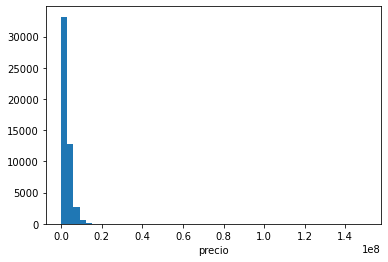

In [5]:
# Variable precio ---------------------
plt.title('')
plt.xlabel("precio")
plt.hist(datos['price'], bins = 50)
plt.show()

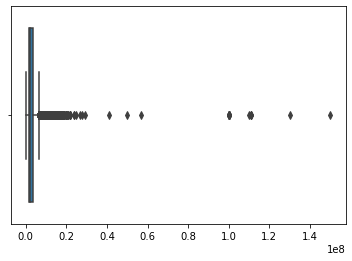

In [6]:
# Cómo ver outliers
sns.boxplot(x=datos['price'])
plt.xlabel('')
plt.show()

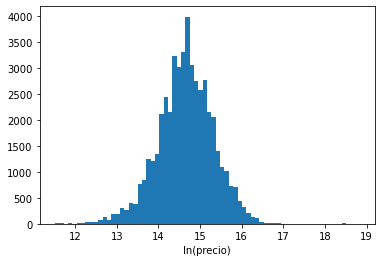

In [7]:
# Variable precio con logartimo ---------------------
plt.title('')
plt.xlabel("ln(precio)")
plt.hist(np.log(datos['price']), bins = 70)
plt.show()

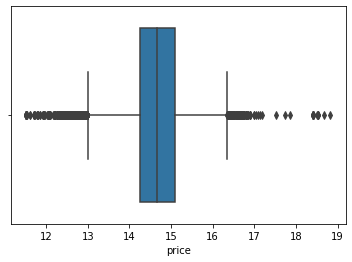

In [8]:
# Cómo ver outliers
sns.boxplot(x=np.log(datos['price']))
plt.show() 

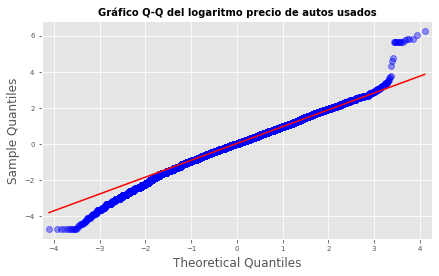

In [27]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    np.log(datos['price']),
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del logaritmo precio de autos usados', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

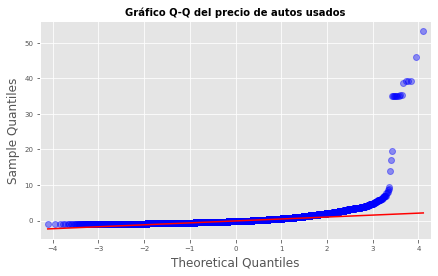

In [26]:
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    datos['price'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q del precio de autos usados', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

In [24]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(np.log(datos['price']))
shapiro_test

ShapiroResult(statistic=0.9927784204483032, pvalue=4.0637655465419695e-42)

In [23]:
# Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos['price'])
shapiro_test

ShapiroResult(statistic=0.4980353116989136, pvalue=0.0)

In [21]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(np.log(datos['price']))
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 1162.254695656737, p-value = 4.164851826538847e-253


In [25]:
# D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos['price'])
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 106524.61294361742, p-value = 0.0


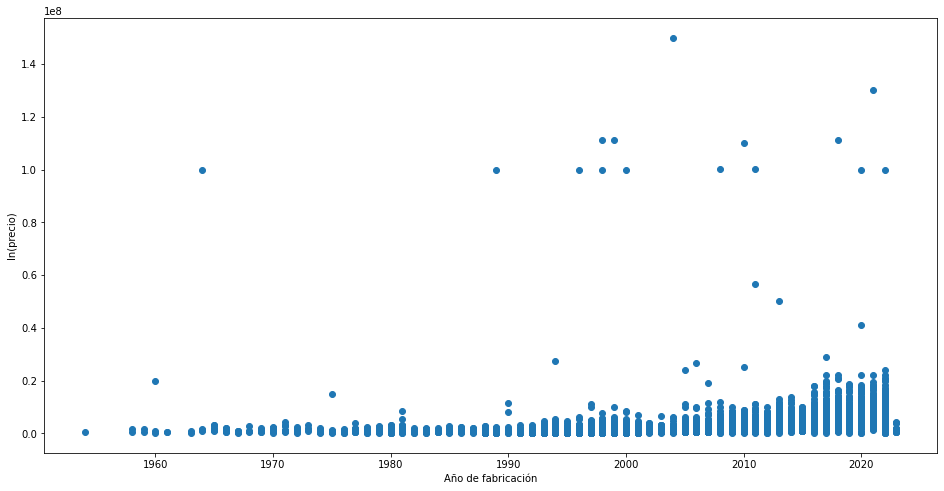

In [46]:
# Otra manera de ver outliers para Precio & Año
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(datos['Año'], datos['price'])
ax.set_xlabel('Año de fabricación')
ax.set_ylabel('ln(precio)')
plt.show()

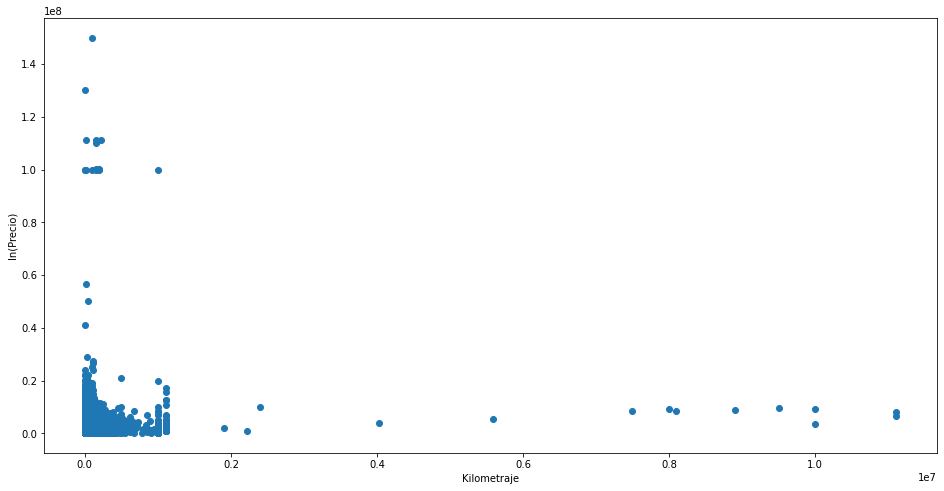

In [47]:
# Otra manera de ver outliers para Precio & KM
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(datos['Kilómetros'], datos['price'])
ax.set_xlabel('Kilometraje')
ax.set_ylabel('ln(Precio)')
plt.show()

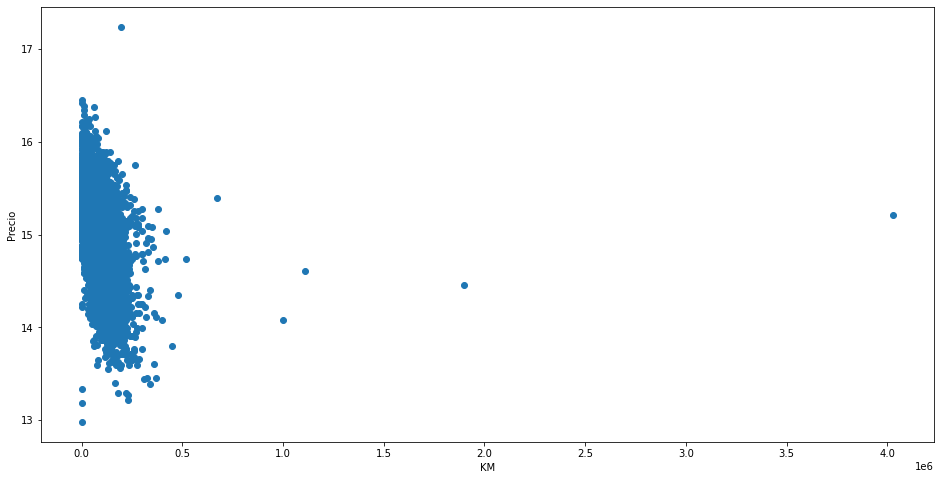

In [54]:
# Kilometraje y Log(Precio)
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(datos['Kilómetros'], np.log(datos['price']))
ax.set_xlabel('KM')
ax.set_ylabel('Precio')
plt.show()

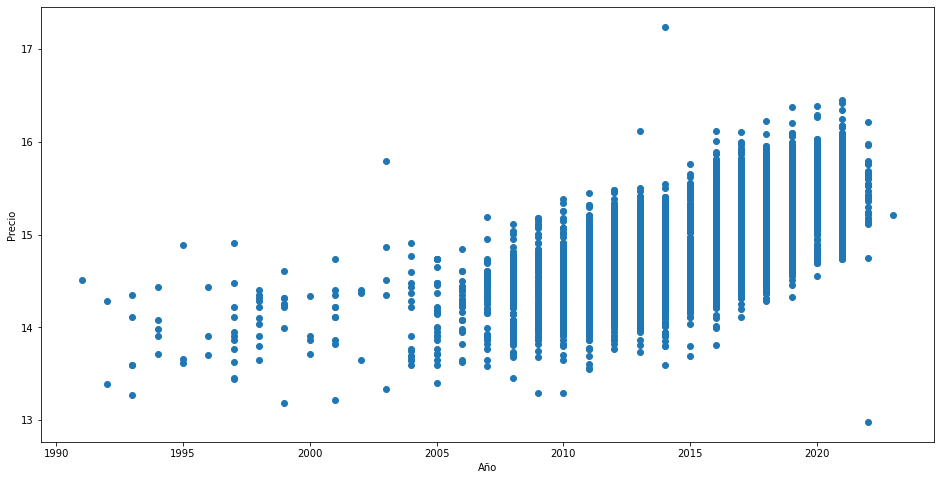

In [70]:
# Kilometraje y Log(Precio)
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(datos['Año'], np.log(datos['price']))
ax.set_xlabel('Año')
ax.set_ylabel('Precio')
plt.show()

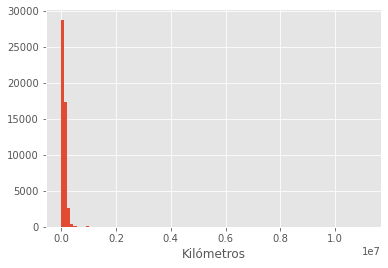

In [29]:
# Variable KMT --------------------------- 
plt.title('')
plt.xlabel("Kilómetros")
plt.hist(datos['Kilómetros'], bins = 100)
plt.show()

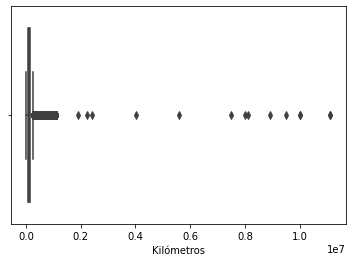

In [36]:
# Grafico los outliers
sns.boxplot(x=datos['Kilómetros'])
plt.show()

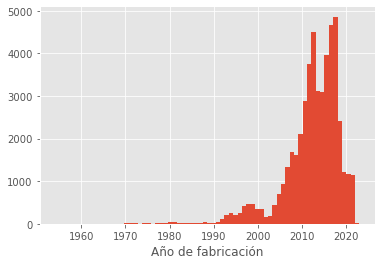

In [30]:

# Variable Year --------------------------- 
plt.title('')
plt.xlabel('Año de fabricación')
plt.hist(datos['Año'], bins = 70)
plt.show()

In [31]:
# Descripción del Precio
datos['Kilómetros'].describe()

count    4.947400e+04
mean     1.136576e+05
std      1.550418e+05
min      1.000000e+00
25%      6.084700e+04
50%      9.900000e+04
75%      1.450000e+05
max      1.111111e+07
Name: Kilómetros, dtype: float64

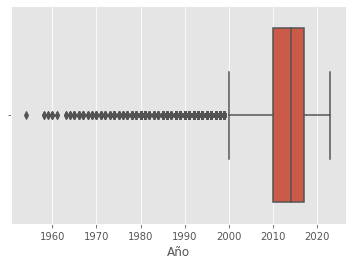

In [32]:

# Grafico los outliers
sns.boxplot(x=datos['Año'])
plt.show()

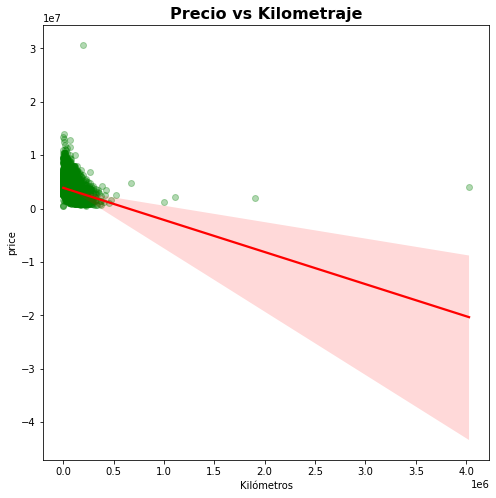

In [72]:
# Relación entre km & precio --------------------------- 

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.regplot(x="Kilómetros", y="price", data=datos,
            scatter_kws={'color':'green', 'alpha':0.3},
            line_kws={'color':'red'})
ax.set_title('Precio vs Kilometraje',
             fontsize=16, weight="bold")
plt.show()


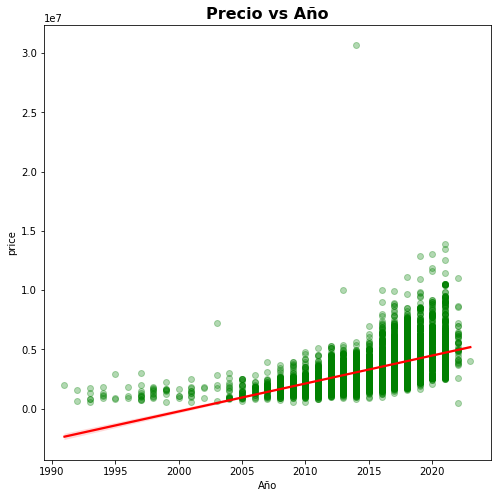

In [73]:
# Relación entre year & precio --------------------------- 

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.regplot(x="Año", y="price", data=datos,
            scatter_kws={'color':'green', 'alpha':0.3},
            line_kws={'color':'red'})
ax.set_title('Precio vs Año',
             fontsize=16, weight="bold")
plt.show()

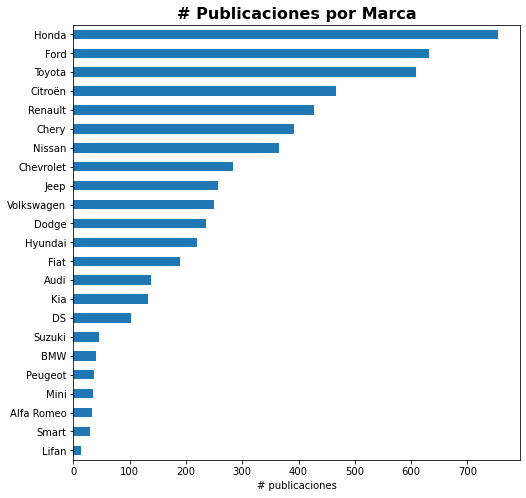

In [12]:
# Relación entre marca & precio --------------------------- 

marca_cnt = datos['Marca'].value_counts(sort=False).sort_values(ascending=True)

marca_cnt_bar = marca_cnt.plot(kind='barh', y="Marca", 
                           legend=False, figsize=(8, 8))
marca_cnt_bar.set_title("# Publicaciones por Marca",
                      fontsize=16, weight="bold")
marca_cnt_bar.set_xlabel("# publicaciones")

plt.show()

In [13]:
datos

,id,price,currency_id,available_quantity,listing_type_id,condition,catalog_product_id,tags,order_backend,Marca,...,adresscity_name,Único dueño,Control de tracción,Motor,Transmisión,Aire acondicionado,Cilindrada,Largo,Capacidad de personas,Potencia
0,MLA1133532094,3450000,ARS,1,gold_premium,used,MLA15520177,"['good_quality_picture', 'good_quality_thumbna...",7,Toyota,...,Capital Federal,NaN,Delantera,1.5,Manual,NaN,1.5 L,3945 mm,5.0,107 hp
1,MLA1133510417,4300000,ARS,1,gold_premium,used,MLA17086228,"['good_quality_picture', 'good_quality_thumbna...",8,Toyota,...,Capital Federal,No,Delantera,1.5,Manual,No,1.5 L,3945 mm,5.0,107 hp
2,MLA1132726637,4490000,ARS,1,gold_premium,used,MLA15520175,"['good_quality_picture', 'good_quality_thumbna...",21,Toyota,...,Pilar,NaN,Delantera,1.5,Manual,NaN,1.5 L,3945 mm,5.0,107 hp
3,MLA1130792055,4490000,ARS,1,gold_premium,used,MLA15520175,"['good_quality_picture', 'good_quality_thumbna...",40,Toyota,...,Pilar,NaN,Delantera,1.5,Manual,NaN,1.5 L,3945 mm,5.0,107 hp
4,MLA1123872922,4399000,ARS,1,gold_premium,used,MLA18647552,"['good_quality_picture', 'good_quality_thumbna...",25,Toyota,...,Villa Carlos Paz,NaN,Delantera,1.5,Automática,NaN,1495 cc,3945 mm,5.0,107 hp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5679,MLA1127369241,2600000,ARS,1,gold_premium,used,MLA8695549,"['good_quality_picture', 'good_quality_thumbna...",24,Audi,...,Bragado,NaN,Delantera,1.4,Manual,Sí,1390 cc,3954 mm,4.0,122 hp
5680,MLA1133625636,3950000,ARS,1,gold,used,MLA10229569,"['dragged_visits', 'good_quality_picture', 'go...",42,Audi,...,Capital Federal,NaN,Delantera,1.4,Manual,Sí,1390 cc,3954 mm,4.0,122 hp
5681,MLA1120157467,1990000,ARS,1,gold,used,MLA8684257,"['good_quality_picture', 'good_quality_thumbna...",22,Audi,...,La Matanza,NaN,Delantera,1.4,Manual,Sí,1390 cc,3954 mm,4.0,122 hp
5682,MLA1124163157,2800000,ARS,1,gold,used,MLA8695549,"['good_quality_picture', 'good_quality_thumbna...",17,Audi,...,Capital Federal,NaN,Delantera,1.4,Manual,Sí,1390 cc,3954 mm,4.0,122 hp


In [19]:
precio_marca = datos.pivot_table(index="Marca",
                          values=["price"],
                          aggfunc='mean')
precio_marca.head()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

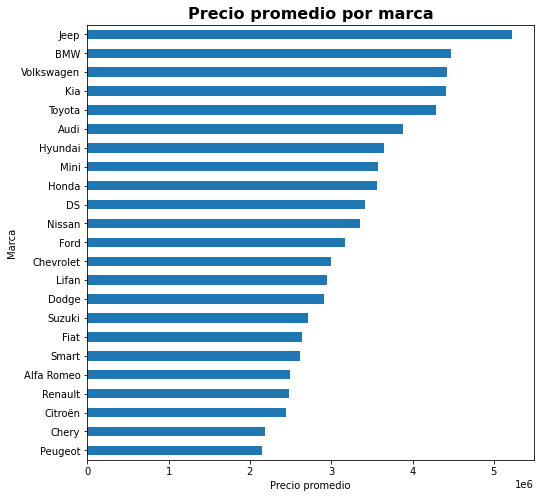

In [17]:
precio_marca.sort_values("price", ascending=True, inplace=True)
precio_marca_bar = precio_marca.plot(kind="barh", y="price", figsize=(8, 8), legend=False)

precio_marca_bar.set_xlabel("Precio promedio")
precio_marca_bar.set_title("Precio promedio por marca",
                  fontsize=16, weight="bold")
plt.show()

In [ ]:
# Relación entre provincia & precio --------------------------- 

provincia_cnt = datos['provincia'].value_counts(sort=False).sort_values(ascending=True)
provincia_cnt_bar = provincia_cnt.plot(kind='barh', y="provincia", 
                           legend=False, figsize=(8, 8))
provincia_cnt_bar.set_title("# Publicaciones por Provincia",
                      fontsize=16, weight="bold")
provincia_cnt_bar.set_xlabel("# publicaciones")
plt.show()

In [ ]:
# Busco los promedios
precio_provincia = datos.pivot_table(index="provincia",
                          values=["precio"],
                          aggfunc='mean')
precio_provincia.head()

In [ ]:
# Los grafico

precio_provincia.sort_values("precio", ascending=True, inplace=True)
precio_provincia_bar = precio_provincia.plot(kind="barh", y="precio", figsize=(8, 8), legend=False)

precio_provincia_bar.set_xlabel("Precio promedio")
precio_provincia_bar.set_title("Precio promedio por provincia",
                  fontsize=16, weight="bold")
plt.show()
#%%

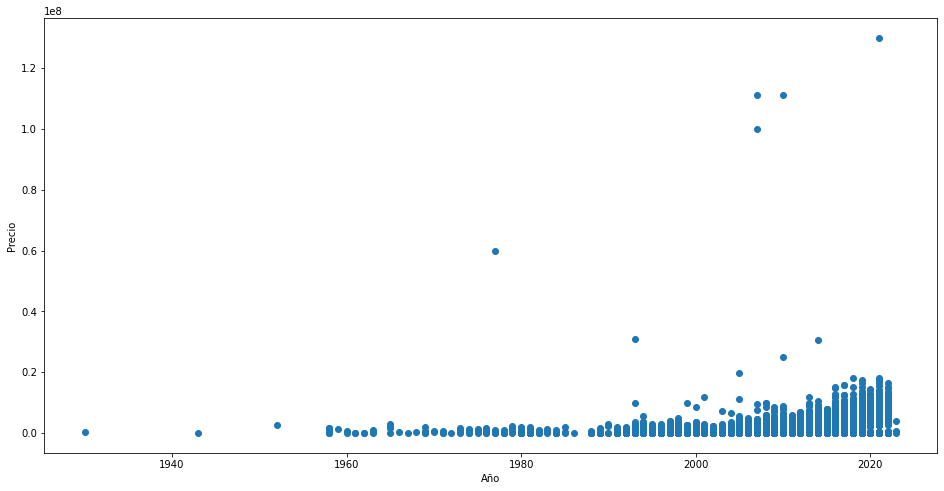

KeyError: 'year'

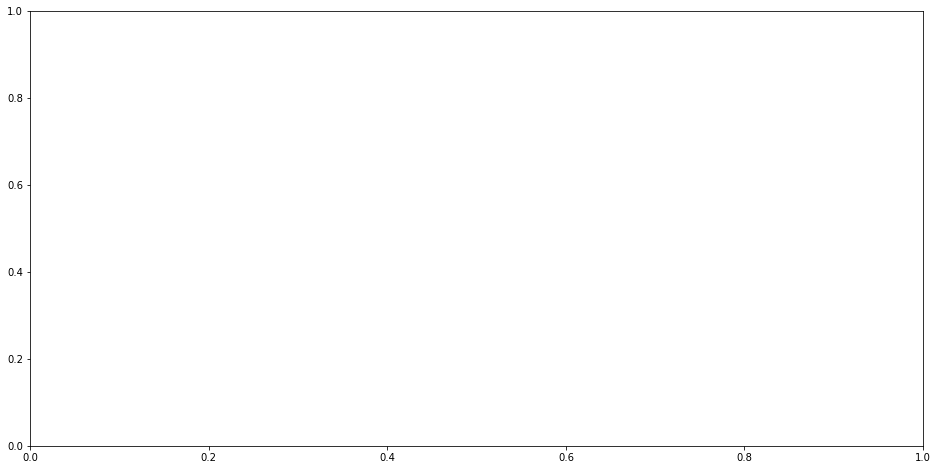

In [40]:
# Relación entre localidad & precio --------------------------- 

loc_cnt = datos['localidad'].value_counts(sort=False).sort_values(ascending=True)
loc_cnt_bar = loc_cnt.plot(kind='barh', y="localidad", 
                           legend=False, figsize=(8, 8))
loc_cnt_bar.set_title("# Publicaciones por Localidad",
                      fontsize=16, weight="bold")
loc_cnt_bar.set_xlabel("# publicaciones")
plt.show()

# Busco los promedios
precio_loc = datos.pivot_table(index="localidad",
                          values=["precio"],
                          aggfunc='mean')
precio_loc.head()

# Los grafico

precio_loc.sort_values("precio", ascending=True, inplace=True)
precio_loc_bar = precio_loc.plot(kind="barh", y="precio", figsize=(8, 8), legend=False)

precio_loc_bar.set_xlabel("Precio promedio")
precio_loc_bar.set_title("Precio promedio por localidad",
                  fontsize=16, weight="bold")
plt.show()

# Relación entre modelo & precio --------------------------- 

mod_cnt = datos['modelo'].value_counts(sort=False).sort_values(ascending=True)
mod_cnt_bar = mod_cnt.plot(kind='barh', y="modelo", 
                           legend=False, figsize=(8, 8))
mod_cnt_bar.set_title("# Publicaciones por Modelo",
                      fontsize=16, weight="bold")
mod_cnt_bar.set_xlabel("# publicaciones")
plt.show()

# Busco los promedios
precio_mod = datos.pivot_table(index="modelo",
                          values=["precio"],
                          aggfunc='mean')
precio_mod.head()

# Los grafico

precio_mod.sort_values("precio", ascending=True, inplace=True)
precio_mod_bar = precio_mod.plot(kind="barh", y="precio", figsize=(8, 8), legend=False)

precio_mod_bar.set_xlabel("Precio promedio")
precio_mod_bar.set_title("Precio promedio por localidad",
                  fontsize=16, weight="bold")
plt.show()
# %%